#**MORTALITY RATE ANALYSIS AND PREDICITON**

<p align="center">
  <img width="600" height="325" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQkQz50DoqEHuYF7JGsWxfdBPOagT-geA5X_A&usqp=CAU">
</p>

* A mortality rate is the number of deaths due to a disease divided by the total population. If there are 25 lung cancer deaths in one year in a population of 30,000, then the mortality rate for that population is 83 per 100,000.

* We use mortality statistics to: produce population estimates and population projections, both national and subnational, produce life expectancy estimates, and quality assure census estimates.

### The dataset being used is curated from WHO's Health Dataset catalog. It contains mortality rate for people worldwide classified on age and gender.
https://www.kaggle.com/datasets/navinmundhra/world-mortality

https://www.kaggle.com/code/vishesh1412/life-expectancy-prediction-feature-selection-ols/data


##IMPORT THE LIBRARIES

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Distribution graphs of column data


In [2]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'g', edgecolor = 'g')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 2.0, w_pad = 3.0, h_pad = 1.0)
    plt.show()

##IMPORT THE ADULT MORTALITY DATASET

In [3]:
nRowsRead = 1000 
# Adult mortality.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/Adult mortality.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Adult mortality.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 5 columns


In [4]:
df1.info

<bound method DataFrame.info of       Unnamed: 0 Unnamed: 1  \
0        Country       Year   
1    Afghanistan       2016   
2    Afghanistan       2015   
3    Afghanistan       2014   
4    Afghanistan       2013   
..           ...        ...   
995      Finland       2008   
996      Finland       2007   
997      Finland       2006   
998      Finland       2005   
999      Finland       2004   

    Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)  \
0                                           Both sexes                                        
1                                                  245                                        
2                                                  233                                        
3                                                  234                                        
4                                                  235                                        
..                       

In [5]:
df1 = df1.iloc[1:, :]
df1.head(20)

,Unnamed: 0,Unnamed: 1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population),Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).1,Adult mortality rate (probability of dying between 15 and 60 years per 1000 population).2
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215
5,Afghanistan,2012,242,262,221
6,Afghanistan,2011,248,268,227
7,Afghanistan,2010,255,275,233
8,Afghanistan,2009,260,281,238
9,Afghanistan,2008,265,286,243
10,Afghanistan,2007,273,294,250


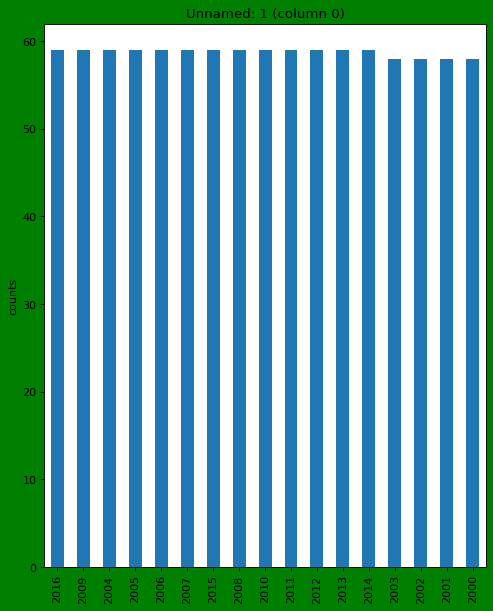

In [6]:
plotPerColumnDistribution(df1, 15, 9)

##IMPORT THE MATERNAL MORTALITY DATASET

In [7]:
nRowsRead = 1000 
# Maternal mortality.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/Maternal mortality.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'Maternal mortality.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 4 columns


In [8]:
df2.head(10)

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ]
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ]
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ]
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ]
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ]
5,Afghanistan,2012,858 [ 662 - 1 130 ],10 000 [ 7 800 - 13 000 ]
6,Afghanistan,2011,905 [ 706 - 1 160 ],11 000 [ 8 300 - 14 000 ]
7,Afghanistan,2010,954 [ 749 - 1 210 ],11 000 [ 8 800 - 14 000 ]
8,Afghanistan,2009,993 [ 784 - 1 250 ],12 000 [ 9 200 - 15 000 ]
9,Afghanistan,2008,1 030 [ 813 - 1 290 ],12 000 [ 9 500 - 15 000 ]


In [9]:
df2.info

<bound method DataFrame.info of          Country  Year Maternal mortality ratio (per 100 000 live births)  \
0    Afghanistan  2017                                638 [ 427 - 1 010 ]   
1    Afghanistan  2016                                673 [ 457 - 1 040 ]   
2    Afghanistan  2015                                701 [ 501 - 1 020 ]   
3    Afghanistan  2014                                786 [ 592 - 1 080 ]   
4    Afghanistan  2013                                810 [ 617 - 1 080 ]   
..           ...   ...                                                ...   
995     Eswatini  2012                                  435 [ 272 - 718 ]   
996     Eswatini  2011                                  441 [ 280 - 711 ]   
997     Eswatini  2010                                  450 [ 292 - 707 ]   
998     Eswatini  2009                                  460 [ 302 - 704 ]   
999     Eswatini  2008                                  474 [ 318 - 708 ]   

    Number of maternal deaths  
0    7 700 

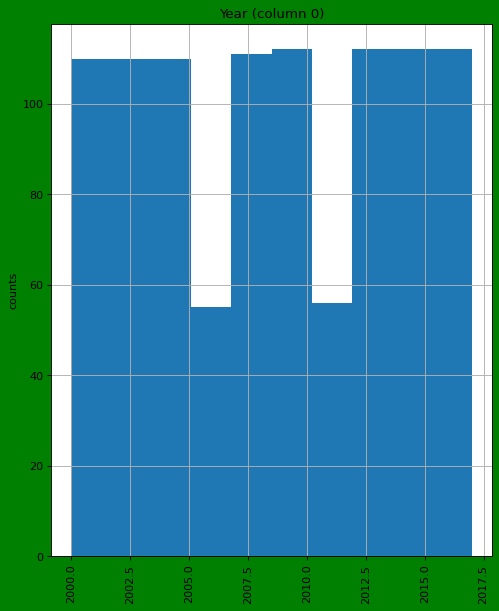

In [10]:
plotPerColumnDistribution(df2, 24, 9)

## LOAD THE NO. OF DEATHS DATASET

In [11]:
nRowsRead = 1000 
# Number of deaths (thousands).csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('/content/Number of deaths (thousands).csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'Number of deaths (thousands).csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 9 columns


In [12]:
df3.head(10)

,Unnamed: 0,Unnamed: 1,Number of under-five deaths (thousands),Number of under-five deaths (thousands).1,Number of under-five deaths (thousands).2,Number of infant deaths (thousands),Number of infant deaths (thousands).1,Number of infant deaths (thousands).2,Number of neonatal deaths (thousands)
0,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237
5,Afghanistan,2014,86378,46509,39869,64808,35410,29398,49715
6,Afghanistan,2013,90103,48461,41642,67154,36656,30498,51219
7,Albania,2018,302,167,135,268,150,118,222
8,Albania,2017,313,174,139,278,156,122,221
9,Albania,2016,326,181,145,289,162,127,218


In [13]:
df3.info

<bound method DataFrame.info of       Unnamed: 0 Unnamed: 1 Number of under-five deaths (thousands)  \
0        Country       Year                              Both sexes   
1    Afghanistan       2018                                   74278   
2    Afghanistan       2017                                   76877   
3    Afghanistan       2016                                   79770   
4    Afghanistan       2015                                   82918   
..           ...        ...                                     ...   
995        Sudan       2014                                   85771   
996        Sudan       2013                                   87192   
997     Suriname       2018                                     201   
998     Suriname       2017                                     209   
999     Suriname       2016                                     217   

    Number of under-five deaths (thousands).1  \
0                                        Male   
1                

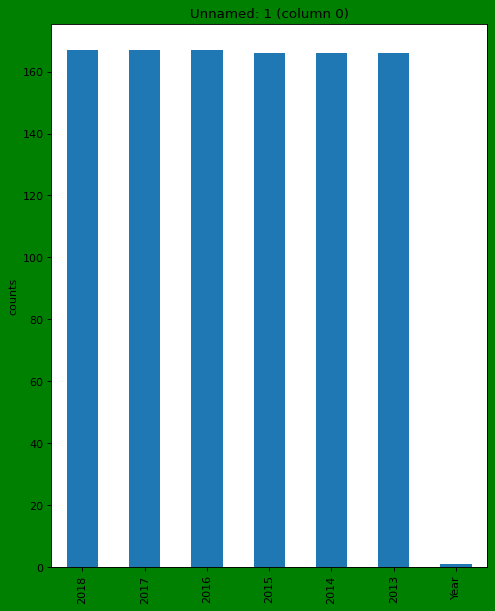

In [14]:
plotPerColumnDistribution(df3, 10, 5)

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

### Hence, different visualization techniques can be used to get deeper insights into data and hence make predictive analysis

### Now to make predictions, we will make use of another dataset provided by WHO

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Basic Data Cleaning and Preprocessing</div>
<center>


Data cleaning and preprocessing is very essential to get an overall feel of the data. Preprocessing is important to feed the data further in the algorithms so that they can work effectively.

In [16]:
data = pd.read_csv('/content/Life Expectancy Data.csv')

In [17]:
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [18]:
df = pd.DataFrame(data)
df.shape

(2938, 22)

We can see that our dataset contains 2938 rows and 22 attributes!

Now let's see the correlation coefficient of all the attributes with the other attributes, as this will tell us more about how the various attributes depend on each other and we'll get a better insight on the dependency of attributes over each other.

In [19]:
df.corr()
# this will make a correlation matrix which computes the Pearsons correlation coefficent 
# of columns with each other.

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


Now let's make a heatmap out of the above matrix for a better visual understanding

In [20]:
corr = df.corr()
corr.style.background_gradient(cmap='nipy_spectral_r')

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


From the above heatmap, we can draw the following conclusions:
1. Percentage Expenditure and GDP are quite highly correlated (0.89)
2. Schooling is correlated nicely with Life Expectancy (0.75), which tells an interesting insight that can this be due to helthy lifestyle which one learns through the schooling process?
3. Hepatitis B is correlated with Diptheria (0.61), which can tell us that maybe these two depend on a common factor (might be some causants)


Now let's check for the missing values in our dataset so that we can impute those values with suitable data points

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Finding Missing Values</div>
<center>


Missing values can prove to be a major pain as they may affect the run of the algorithms as almost all the algorithms expect the full data but return error if some points are missing. So, cleaning the data is essential!

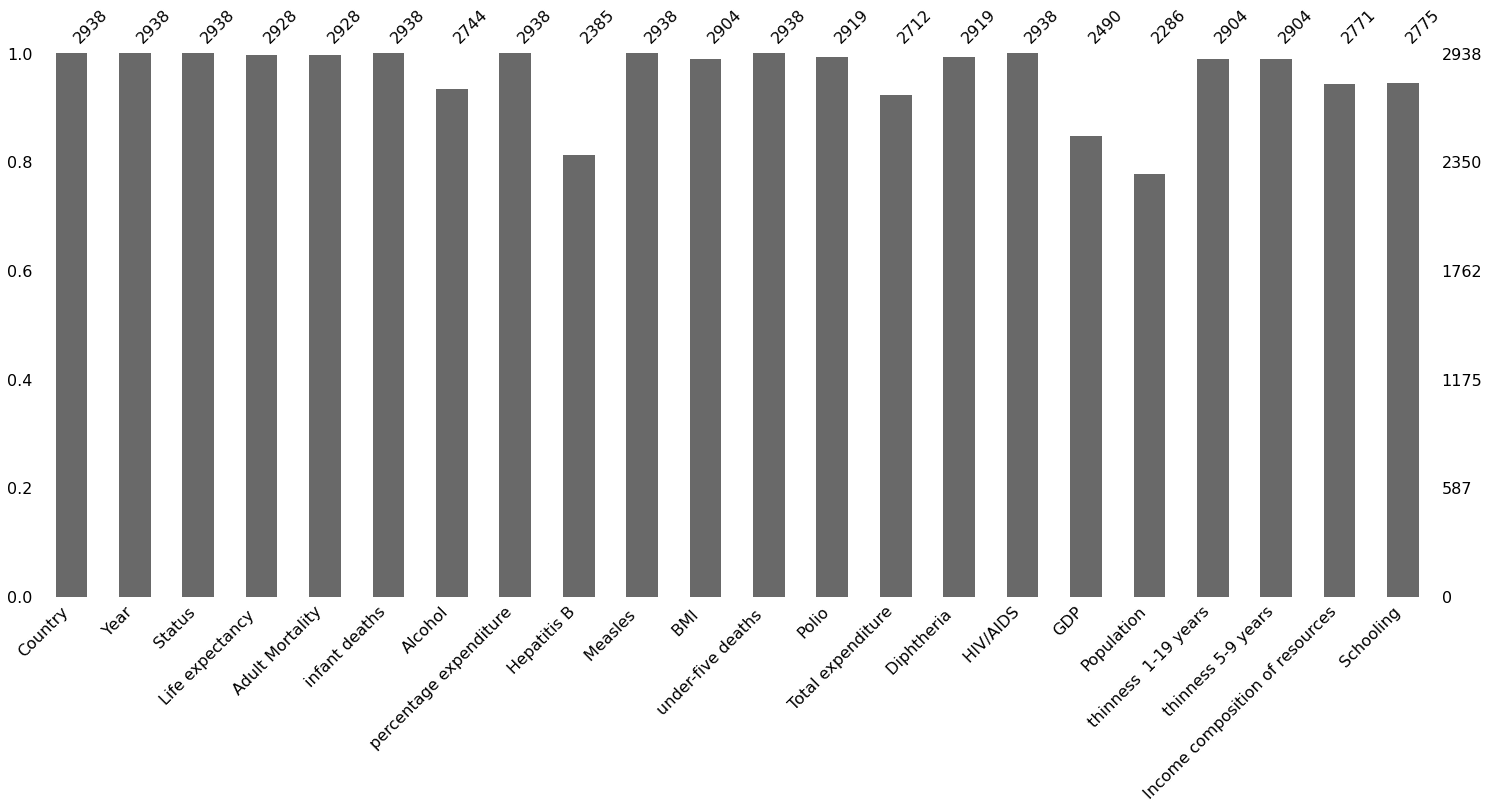

In [22]:
# using missingno library to get a feel of the missing entries

import missingno as msno
msno.bar(df)

Using the above bar chart, we can see that many attributes have missing values, like Hepatitis B has 2385 values, whereas the expected number of values for every attribute is 2938.
Now we have to find a way to fill in all these missing values as these may cause problems for our algorithm.
We'll use the impute method of pd.DataFrame.fillna and impute the previous values in all these missing fields, previous values can be a good way to fill in such entries.

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Imputing Missing Values</div>
<center>


There are many ways to impute the mission data points like:
* Fill the missing points with the mean of rest of the data
* Fill the missing values with previous values
* Fill the missing points with the median of rest of the dataset
<br><br> We'll fill the values with previous points

In [23]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=5f0a22b4d65d26e1259ad378915bb247529eb3bf0470eabbf152ca6f50cd3def
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


To impute the missing values, we'll have to make sure that we run the imputer after dropping the attributes with textual data (we can use one-hot encoding for that but we don't need it here as the textual data has no missing points).

In [24]:
df_num = df.drop(["Country", "Status"], axis=1)

In [25]:
df_num

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


One interesting thing in this dataset is that the names of the columns are not written in a nice manner, like in some names there is a space before the name, in some after the name and in some names there is a space in both before and after the name like " BMI ". To tackle this, let's print the names of all the columns

In [26]:
df.columns.values.tolist()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

We have stored all the numerical features in df_num dataframe and now we'll use this to impute the values!

In [27]:
df_num["Hepatitis B"].fillna( method ='ffill', inplace = True)
df_num["Alcohol"].fillna( method ='ffill', inplace = True)
df_num["Adult Mortality"].fillna( method ='ffill', inplace = True)
df_num["Polio"].fillna( method ='ffill', inplace = True)
df_num["Total expenditure"].fillna( method ='ffill', inplace = True)
df_num["GDP"].fillna( method ='ffill', inplace = True)
df_num["Population"].fillna( method ='ffill', inplace = True)
df_num["Schooling"].fillna( method ='ffill', inplace = True)
df_num["Income composition of resources"].fillna( method ='ffill', inplace = True)
df_num["Life expectancy "].fillna( method ='ffill', inplace = True)
df_num["Diphtheria "].fillna( method ='ffill', inplace = True)
df_num[" thinness 5-9 years"].fillna( method ='ffill', inplace = True)
df_num[" thinness  1-19 years"].fillna( method ='ffill', inplace = True)
df_num[" BMI "].fillna( method ='ffill', inplace = True)

We have imputed the missing values with the mean of the rest of the data points, now let's check if we have any more missing data

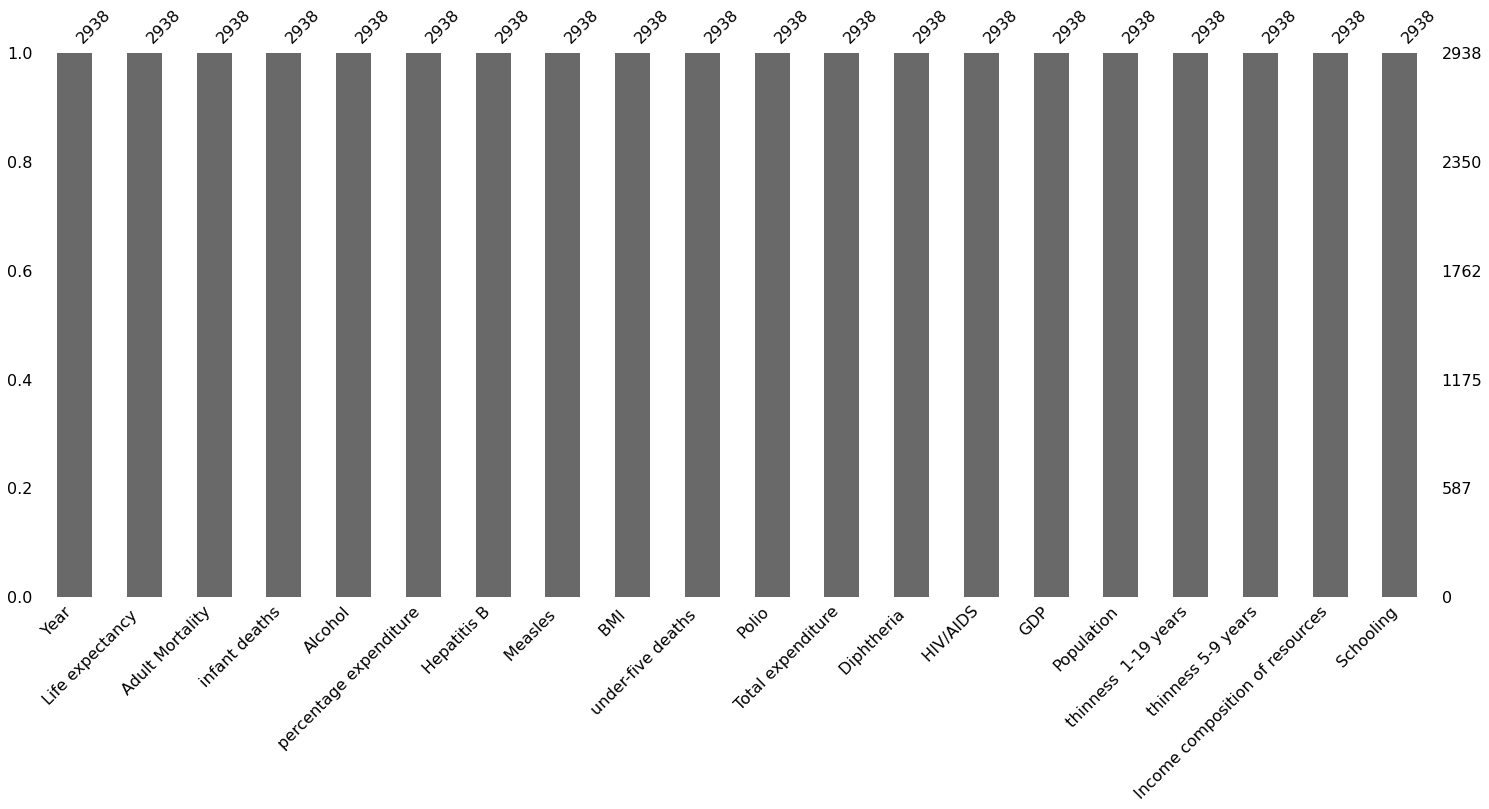

In [28]:
msno.bar(df_num)

We have imputed the values in all the missing data points, and as a result according to the above bar chart, we have no missing values left now.

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Plotting Chloropleth Maps</div>
<center>


Chloropleth maps or graphs can be a very good way to plot the data points on a map. It provides enhanced visuals and helps us to know about the data more easily!

In [29]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
df_chloropleth = df_num
df_chloropleth['Country'] = df['Country']
df_chloropleth

# we'll use this particular dataframe for making chloropleth maps

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Afghanistan
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Afghanistan
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Afghanistan
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Afghanistan
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Zimbabwe
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Zimbabwe
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Zimbabwe
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Zimbabwe


Let's make the chloropleth map for the BMI of different countries!

In [32]:
pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=92648ce71b1b1434b30b2853e1ce0954d22e37e66c059754feb3bb65c450e077
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [34]:
import pycountry
import plotly.express as px
import pandas as pd
URL_DATASET = r'/content/Life Expectancy Data.csv'
df1 = pd.read_csv(URL_DATASET)
list_countries = df1['Country'].unique().tolist()
d_country_code = {} 
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        d_country_code.update({country: ' '})

for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v

fig = px.choropleth(data_frame = df1,
                    title = "BMI of various countries over the years",
                    locations= "iso_alpha",
                    color= " BMI ",  
                    hover_name= "Country",
                    color_continuous_scale= ['cyan','blue','midnightblue','darkblue'], 
                    animation_frame= "Year")

fig.show()

could not add ISO 3 code for -> Bolivia (Plurinational State of)
could not add ISO 3 code for -> Democratic Republic of the Congo
could not add ISO 3 code for -> Iran (Islamic Republic of)
could not add ISO 3 code for -> Micronesia (Federated States of)
could not add ISO 3 code for -> Swaziland
could not add ISO 3 code for -> The former Yugoslav republic of Macedonia
could not add ISO 3 code for -> Venezuela (Bolivarian Republic of)


Looking at the above chloropleth map and analysing it, we see an overall increasing trends in the BMI of most of the countries! So, we can say that on an average, people are getting more and more obese.

Let's draw the same map for the Life Expectancy of the countries over the years

In [35]:
import pycountry
import plotly.express as px
import pandas as pd
URL_DATASET = r'/content/Life Expectancy Data.csv'
df1 = pd.read_csv(URL_DATASET)
list_countries = df1['Country'].unique().tolist()
d_country_code = {} 
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        d_country_code.update({country: ' '})

for k, v in d_country_code.items():
    df1.loc[(df1.Country == k), 'iso_alpha'] = v

fig = px.choropleth(data_frame = df1,
                    title = "Life Expectancy of various countries over the years",
                    locations= "iso_alpha",
                    color= "Life expectancy ",  
                    hover_name= "Country",
                    color_continuous_scale= ['cyan','blue','midnightblue','darkblue'], 
                    animation_frame= "Year")

fig.show()

could not add ISO 3 code for -> Bolivia (Plurinational State of)
could not add ISO 3 code for -> Democratic Republic of the Congo
could not add ISO 3 code for -> Iran (Islamic Republic of)
could not add ISO 3 code for -> Micronesia (Federated States of)
could not add ISO 3 code for -> Swaziland
could not add ISO 3 code for -> The former Yugoslav republic of Macedonia
could not add ISO 3 code for -> Venezuela (Bolivarian Republic of)


In the same fashion we can draw the chloropleth maps of other attributes as well!

Now let's have a look at the distribution of some of the different columns

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Plotting Distributions of the Attributes</div>
<center>


Distributions of the attributes can be a very good way to get to know more about the data as using them we can reach to interesting conclusions and modelling the data becomes important!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



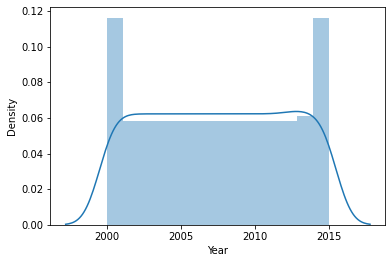

In [36]:
sns.distplot(df_num['Year']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



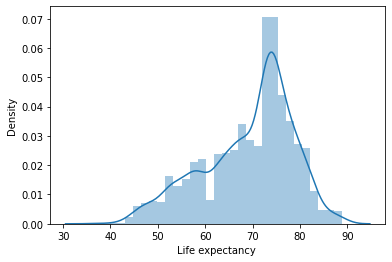

In [37]:
sns.distplot(df_num['Life expectancy ']);

In [ ]:
sns.distplot(df_num['Alcohol']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



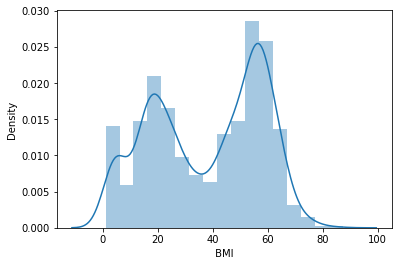

In [40]:
sns.distplot(df_num[' BMI ']);

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Kolmogorov Smirnov Test and Comparisons | Distribution Analysis</div>
<center>


We can see that the BMI attribute does not look normally distributed, so let's run Kolmogorov-Smirnov test to see whether our auumption is true or not and to see that whether it works or not!

Now let's analyse the distributions using Kolmorogov- Smirnov test

In [41]:
df_num.columns.values.tolist()

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'Country']

In [42]:
from scipy.stats import kstest, norm

#perform Kolmogorov-Smirnov test
kstest(df_num['Alcohol'], 'norm')

KstestResult(statistic=0.6197707955799049, pvalue=0.0)

We observe that when we run Kolmorogov-Smirnov test on the "Alcohol" attribute, the p-value is 0, which is less than 0.05, so we reject the hypothesis and get to know that the data does not come from a normal distribution! Now let's run the same test on some other attributes.

We'll run the test on the following attributes and then have look at their graphs to see how close are we! 

In [43]:
kstest(df_num[' BMI '], 'norm')

KstestResult(statistic=0.9811967335850476, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



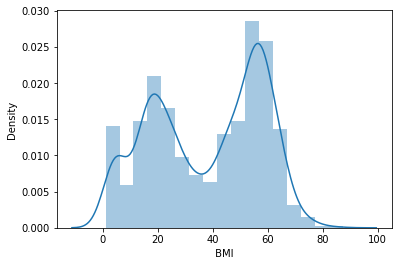

In [44]:
sns.distplot(df_num[' BMI ']);

Like we observed in our graph made above, the KS test also quantifies that the BMI is not normally distributed.

In [45]:
kstest(df_num['Life expectancy '], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



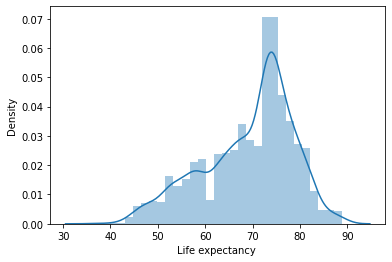

In [46]:
sns.distplot(df_num['Life expectancy ']);

In [47]:
kstest(df_num['Year'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



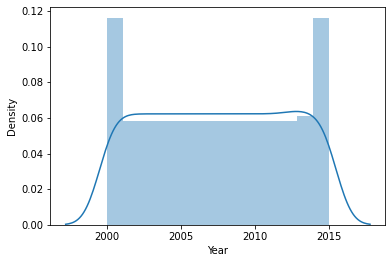

In [48]:
sns.distplot(df_num['Year']);
# this looks as two distributions overlap each other as we can see two peaks, or we can say
# that it is bimodal!

In [49]:
kstest(df_num[ 'Adult Mortality'], 'norm')

KstestResult(statistic=0.9918427500282746, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



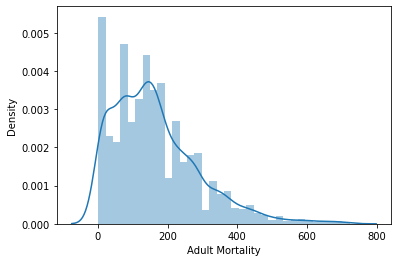

In [50]:
sns.distplot(df_num['Adult Mortality']);

# in the initial phase it looks gaussian, however later in phase, it resembles more as an 
# exponential distribution!

In [51]:
kstest(df_num[ 'infant deaths'], 'norm')

KstestResult(statistic=0.5722124276161502, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



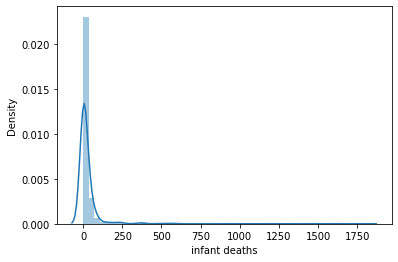

In [52]:
sns.distplot(df_num['infant deaths']);

# this resembles the poisson distribution!

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Data Scaling | Normalization</div>
<center>


We can perform the feature scaling using two methods:
* Normalization: Making the values between 0 and 1
* Standardization: Transforming the data so that the mean is 0 and standard deviation is 1
<br><br>Since both of these are part of feature scaling, let's chose the first one and normalize the data and set it to be between 0 and 1.

In [53]:
df_fin = df.drop(["Country", "Status"], axis=1)
df_fin

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_fin), columns=df_fin.columns)
df_norm

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.000000,0.544592,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.933333,0.447818,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.866667,0.447818,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.800000,0.440228,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.733333,0.434535,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.266667,0.151803,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,0.0168,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,0.200000,0.155598,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,0.0164,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,0.133333,0.161290,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,0.0160,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,0.066667,0.170778,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,0.0156,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


We have stored our scaled data in df_norm DataFrame and now we'll use this dataframe to feed into the regression pipeline further!

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">SK Learn Pipeline</div>
<center>


Now we have to make a pipeline which takes the raw data as input and finally prepares the data we just finalized, including the scaled values!

We'll transform the data into final scaled format in just one cell as below:

In [57]:
sk_data = pd.read_csv('/content/Life Expectancy Data.csv')
sk_num = sk_data.drop(["Country", "Status"], axis=1)

# till here we have dropped textual attributes

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(sk_num[['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']])
sk_num[['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']] = imputer.transform(sk_num[['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']])

# Now we have also imputed the missiong values using mean method


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sk_norm = pd.DataFrame(scaler.fit_transform(sk_num), columns=sk_num.columns)
sk_norm

# We have also scaled our data, so our SK Learn pipeline is ready!

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,1.000000,0.544592,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.933333,0.447818,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.866667,0.447818,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.800000,0.440228,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.733333,0.434535,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.266667,0.151803,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,0.0168,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,0.200000,0.155598,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,0.0164,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,0.133333,0.161290,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,0.0160,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,0.066667,0.170778,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,0.0156,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


Above is the result when we used normalization, which scales the values between 0 and 1, now let's scale the data as done below using SKLearn pipeline

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin

class fill_median(BaseEstimator, TransformerMixin):
    # Taking which column to modify as "col" parameter
    def __init__(self, col):
        self.col = col
    
    # Fit just calculated the median value and stores it as class variable
    def fit(self, X, y=None):
        self.median = X[self.col].median()
        return self
    
    # Transform updates all NaN values with median
    def transform(self, X):
        return X.fillna(self.median)
    

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pre_pipe = Pipeline([
    ('fillna', fill_median(col=['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling'])),
    ('Standard_scaling', StandardScaler())
])

# we are calling fit_transform() on pipeline, so the pipeline is learning parameters from input data.
# Later it also transforms the input data as per the "transform()" definition of each object
train_prepared = pre_pipe.fit_transform(sk_num)
train_prepared

array([[ 1.6217623 , -0.44444792,  0.79158632, ...,  2.77327898,
        -0.72540055, -0.57993072],
       [ 1.40498625, -0.98094995,  0.85607167, ...,  2.81790246,
        -0.74005007, -0.61056961],
       [ 1.1882102 , -0.98094995,  0.83188966, ...,  2.86252595,
        -0.7693491 , -0.6412085 ],
       ...,
       [-1.19632639, -2.56941673, -0.73994077, ..., -0.79659991,
        -0.97932554, -0.61056961],
       [-1.41310244, -2.5168185 ,  4.20124926, ..., -0.70735294,
        -0.97932554, -0.6718474 ],
       [-1.62987849, -2.44318096,  4.03197521, ...,  1.41226265,
        -0.94514333, -0.6718474 ]])

Above is our final scaled values which we got using sklearn! However, we are not going to use the scaled data, as it may cause problems, so we'll go with normalized data instead.

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Splitting the Data in Test and Train Manually & Running Linear Regression</div>
<center>


Validation set is very imporatant to judge the algorithm before we decide it to show the unseen data, as once the model sees the test data, it may get biased and that's what we want to avoid.<br><br>
Cross validation refers to taking one data points of the data divided into n points (n is the hyperparameter), and then training the data on the rest of the parts. When training is complete, we test the model on the point which was left earlier!<br><br> 
First let's see how the regression runs without the validation set:

In [60]:
sk_norm = sk_norm.drop(['Year'], axis = 1)

In [61]:
sk_norm

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.544592,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.447818,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.447818,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
3,0.440228,0.375346,0.038333,0.000000,0.004014,0.673469,0.013135,0.192352,0.0372,0.666667,0.473012,0.670103,0.000000,0.005608,0.002857,0.644928,0.628070,0.488397,0.473430
4,0.434535,0.379501,0.039444,0.000000,0.000364,0.683673,0.014200,0.187717,0.0388,0.677083,0.435287,0.680412,0.000000,0.000519,0.002302,0.655797,0.635088,0.478903,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,0.151803,1.000000,0.015000,0.243561,0.000000,0.683673,0.000146,0.302433,0.0168,0.666667,0.392339,0.649485,0.663366,0.003799,0.009875,0.336957,0.326316,0.429325,0.444444
2934,0.155598,0.988920,0.014444,0.226764,0.000000,0.061224,0.004703,0.297798,0.0164,0.041667,0.356936,0.680412,0.724752,0.003790,0.009764,0.351449,0.343860,0.440928,0.458937
2935,0.161290,0.099723,0.013889,0.247480,0.000000,0.734694,0.001433,0.293163,0.0160,0.729167,0.357516,0.711340,0.786139,0.000467,0.000097,0.039855,0.042105,0.450422,0.483092
2936,0.170778,0.948753,0.013889,0.095745,0.000000,0.765306,0.002493,0.288528,0.0156,0.760417,0.336042,0.752577,0.831683,0.004589,0.009558,0.054348,0.056140,0.450422,0.473430


We dropped the year column as year in which the data was collected is not having any effect of the life expectancy

In [62]:
X = sk_norm.iloc[:,1:].values
y = sk_norm.iloc[:,0].values

We did this to separate dependent and independent variables

In [63]:
X

array([[0.36288089, 0.03444444, 0.        , ..., 0.60350877, 0.50527426,
        0.48792271],
       [0.37396122, 0.03555556, 0.        , ..., 0.61052632, 0.5021097 ,
        0.48309179],
       [0.36980609, 0.03666667, 0.        , ..., 0.61754386, 0.49578059,
        0.47826087],
       ...,
       [0.09972299, 0.01388889, 0.2474804 , ..., 0.04210526, 0.45042194,
        0.48309179],
       [0.94875346, 0.01388889, 0.09574468, ..., 0.05614035, 0.45042194,
        0.47342995],
       [0.91966759, 0.01333333, 0.09350504, ..., 0.38947368, 0.45780591,
        0.47342995]])

In [64]:
y

array([0.54459203, 0.44781784, 0.44781784, ..., 0.16129032, 0.17077799,
       0.18406072])

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [66]:
print(regressor.intercept_)

0.34910800852563817


In [67]:
print(regressor.coef_)

[-2.78602147e-01  3.39970082e+00  4.11307247e-02  4.95608951e-02
 -2.62567742e-02 -8.23929305e-02  7.10685634e-02 -3.52814421e+00
  5.23675923e-02  2.91344652e-02  7.30206775e-02 -4.51835731e-01
  8.28333854e-02  1.06475254e-03 -4.35969015e-02  3.28221324e-04
  1.07809565e-01  2.63019725e-01]


With this we get to know that the line which best fits our data is:<br>
y = -2.78*x1 + 3.99*x2 + .....+ 0.3491<br><br>
However, we have not checked this line for accuracy using a test set and a training set, so let's try that approach!

Now let's make a part of code which splits the data into training and testing set so that we can see that how our model fares on the test set!

In [68]:
import random
total=[]
for i in range (0,len(sk_norm)):
    total.append(i)
    
num_train = int(len(total)*0.8)
num_test = len(total) - num_train

set_train = random.sample(total, num_train) # we take random sample of 80% data for training
set_test = [i for i in total if i not in set_train] # we take rest of the 20% data for the test set

In [69]:
train = sk_norm.iloc[set_train,:] 
train

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2285,0.688805,0.243767,0.000000,0.543673,0.057571,1.000000,0.000000,0.384705,0.0000,1.000000,0.174695,1.000000,0.000000,0.102275,0.000068,0.202899,0.210526,0.784810,0.642512
468,0.582543,0.024931,0.007222,0.118141,0.003090,0.887755,0.003403,0.185400,0.0060,0.875000,0.305862,0.886598,0.003960,0.007391,0.011236,0.394928,0.389474,0.562236,0.516908
342,0.434535,0.542936,0.001111,0.279955,0.021909,0.948980,0.000867,0.390498,0.0012,0.968750,0.349391,0.969072,0.176238,0.043501,0.001530,0.300725,0.284211,0.697257,0.589372
2177,0.705882,0.213296,0.000000,0.752520,0.000000,0.857143,0.000000,0.039397,0.0000,0.854167,0.348230,0.855670,0.000000,0.062779,0.009857,0.152174,0.150877,0.732068,0.599034
816,0.612903,0.243767,0.035000,0.007279,0.000000,1.000000,0.010133,0.581692,0.0312,1.000000,0.312246,1.000000,0.000000,0.062779,0.009857,0.123188,0.115789,0.645570,0.536232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,0.679317,0.254848,0.000000,0.414334,0.043281,1.000000,0.000000,0.320973,0.0000,1.000000,0.247824,1.000000,0.000000,0.071521,0.000064,0.217391,0.224561,0.752110,0.584541
1421,0.584440,0.300554,0.002222,0.190370,0.000000,1.000000,0.000038,0.422943,0.0016,0.989583,0.301799,1.000000,0.000000,0.062779,0.009857,0.119565,0.115789,0.642405,0.603865
2454,0.709677,0.204986,0.002778,0.090146,0.003061,0.815719,0.000655,0.163384,0.0020,0.989583,0.204295,0.989691,0.000000,0.007313,0.000015,0.554348,0.543860,0.737342,0.608696
2695,0.791271,0.018006,0.022778,0.082867,0.013164,0.775510,0.143786,0.617613,0.0200,0.885417,0.278003,0.886598,0.000000,0.026164,0.049612,0.184783,0.175439,0.688819,0.536232


In [70]:
test = sk_norm.iloc[set_test,:] 
test

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0.544592,0.362881,0.034444,0.000000,0.003659,0.653061,0.005439,0.209733,0.0332,0.031250,0.452118,0.649485,0.000000,0.004889,0.026074,0.619565,0.603509,0.505274,0.487923
1,0.447818,0.373961,0.035556,0.000000,0.003774,0.622449,0.002319,0.203940,0.0344,0.572917,0.453279,0.618557,0.000000,0.005127,0.000253,0.630435,0.610526,0.502110,0.483092
2,0.447818,0.369806,0.036667,0.000000,0.003759,0.642857,0.002027,0.198146,0.0356,0.614583,0.450377,0.639175,0.000000,0.005287,0.024525,0.637681,0.617544,0.495781,0.478261
8,0.402277,0.407202,0.045556,0.000560,0.000560,0.632653,0.005377,0.164542,0.0452,0.625000,0.369124,0.628866,0.000000,0.003089,0.020572,0.684783,0.666667,0.437764,0.405797
10,0.398482,0.401662,0.047222,0.000560,0.000071,0.663265,0.006108,0.152955,0.0472,0.572917,0.483459,0.577320,0.000000,0.000198,0.000199,0.695652,0.680702,0.417722,0.381643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,0.470588,0.346260,0.025556,0.003919,0.000000,0.183673,0.002286,0.355736,0.0252,0.729167,0.230412,0.731959,0.000000,0.062779,0.009857,0.503623,0.487719,0.468354,0.381643
2909,0.434535,0.481994,0.016111,0.144457,0.010109,0.785714,0.004223,0.239861,0.0172,0.041667,0.263494,0.783505,0.108911,0.014544,0.011361,0.231884,0.217544,0.584388,0.594203
2918,0.191651,0.087258,0.021667,0.129899,0.003377,0.815719,0.004152,0.192352,0.0248,0.854167,0.453279,0.835052,0.358416,0.003587,0.008828,0.260870,0.249123,0.467300,0.492754
2920,0.157495,0.844875,0.023889,0.145577,0.002404,0.815719,0.080105,0.186559,0.0280,0.864583,0.359257,0.855670,0.366337,0.003160,0.001410,0.264493,0.256140,0.447257,0.473430


We have successfully splitted the data into the test and train sets respectively. The division is purely random and each time we run the code, a new training set and testing set will be created. Let's run the resgressor algorithm on this training set and then see it's accuracy using the testing set!

In [71]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

x = test.iloc[:,1:].values
Y = test.iloc[:,0].values

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [73]:
predictions=regressor.predict(x)
predictions

array([ 0.45699062,  0.48015322,  0.48177785,  0.43658365,  0.4209772 ,
        0.47174583,  0.37148215,  0.77976828,  0.75105111,  0.73626045,
        0.71946129,  0.71571375,  0.452606  ,  0.48007246,  0.37085985,
        0.40078018,  0.33316735,  0.27985055,  0.43138791,  0.39000447,
        0.7346769 ,  0.73452164,  0.45177419,  0.79289568,  0.77399686,
        0.74591152,  0.74682965,  0.64420663,  0.66092326,  0.94700615,
        0.90212004,  0.90945093,  0.85330006,  0.74960162,  0.88138022,
        0.84007262,  0.83468742,  0.76092098,  0.6934245 ,  0.65198584,
        0.70285092,  0.67075595,  0.61159851,  0.70083156,  0.74488697,
        0.55547991,  0.54019717,  0.52769777,  0.79747027,  0.796821  ,
        0.73630769,  0.73997227,  0.67683244,  0.69859442,  0.67925373,
        0.83448274,  0.85482111,  0.88526048,  0.63887463,  0.6783854 ,
        0.66473035,  0.64181361,  0.53785401,  0.44296562,  0.60725138,
        0.58784228,  0.58183575,  0.47725031,  0.46555271,  0.73

In [74]:
r2_score = regressor.score(x,Y)

In [75]:
print(r2_score*100,'%')

82.34992722420121 %


So, according to our current model, the accuracy that we have got is 83.488%, which is a pretty good score!<br><br> Now let's run the same operation using a validation set!

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Validation Set & Cross Validation (Along with Linear Regression)</div>
<center>


Let's use the concept we used above to make a validation and run a cross validation setting and see our overall accuracy of the model on the training data!

In [76]:
import random
acc = []

number = 10 # this is the hyperparameter which will decide that how many folds you want to use

for i in range (0, number):
    total=[]
    for i in range (0,len(sk_norm)):
        total.append(i)

    num_train = int(len(total)*0.8)
    num_test = len(total) - num_train

    set_train = random.sample(total, num_train) # we take random sample of 80% data for training
    set_test = [i for i in total if i not in set_train] # we take rest of the 20% data for the test set

    train = sk_norm.iloc[set_train,:] 
    test = sk_norm.iloc[set_test,:] 

    X = train.iloc[:,1:].values
    y = train.iloc[:,0].values

    x = test.iloc[:,1:].values
    Y = test.iloc[:,0].values

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X, y)
    r2_score = regressor.score(x,Y)
    acc.append(r2_score)

avg = sum(acc)/len(acc)
print('The average percentage accuracy over the validation set is:')
print(avg*100, '%')

The average percentage accuracy over the validation set is:
80.56427392276862 %


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Feature Selection | Lasso Regularization</div>
<center>


Feature selection is one of the most important parts for any ML model. We always want to select those features which have the maximum effect on our final output. We'll perform the following operations for feature selection:
1. Lasso Method
2. OLS Regression
3. SK Learn

First Let's use the Lasso method for feature selection, and we'll count every feature with a non zero value after regularization

In [77]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [78]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [79]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [80]:
search.fit(X,y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.021 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-0.025 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-0.024 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-0.023 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-0.026 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-0.030 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-0.034 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-0.033 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-0.032 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.035 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.030 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [81]:
search.best_params_

{'model__alpha': 0.1}

In [82]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [83]:
importance = np.abs(coefficients)
importance

array([0.01765309, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00028627, 0.02178586])

We observe that according to the lasso regression, only the features with indices 1, 17 and 18 have the required effect on the final regression result, while the rest of the values hold little to no importance on the result! 

Now let's see that which features are the ones which correspond to the above indices:

In [84]:
indices = []
for i in range(0, len(importance)):
    if importance[i] > 0:
        indices.append(i)
indices

[0, 16, 17]

In [85]:
for i in range(0, len(indices)):
    print(train.columns[indices[i]])

Life expectancy 
 thinness 5-9 years
Income composition of resources


Above are the features which are the best features according to the lasso method for feature selection, so now let's perform the linear regression with these features and see the accuracy!

In [86]:
df_lasso = sk_norm[["Life expectancy ", " thinness 5-9 years", "Income composition of resources"]]

In [87]:
import random
acc = []

number = 10 # this is the hyperparameter which will decide that how many folds you want to use

for i in range (0, number):
    total=[]
    for i in range (0,len(df_lasso)):
        total.append(i)

    num_train = int(len(total)*0.8)
    num_test = len(total) - num_train

    set_train = random.sample(total, num_train) # we take random sample of 80% data for training
    set_test = [i for i in total if i not in set_train] # we take rest of the 20% data for the test set

    train = df_lasso.iloc[set_train,:] 
    test = df_lasso.iloc[set_test,:] 

    X = train.iloc[:,1:].values
    y = train.iloc[:,0].values

    x = test.iloc[:,1:].values
    Y = test.iloc[:,0].values

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X, y)
    r2_score = regressor.score(x,Y)
    acc.append(r2_score)

avg = sum(acc)/len(acc)
print('The average percentage accuracy over the validation set is:')
print(avg*100, '%')

The average percentage accuracy over the validation set is:
52.891673661819624 %


Now let's see the effect of feature selection using forward and backward using a library called mlxtend, we'll see forward selection first

In [90]:
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [92]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

X_bs = train.iloc[:,1:]
y_bs = train.iloc[:,0]

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = X.shape[1],forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_bs, y_bs)
sfs1

feat_names = list(sfs1.k_feature_names_)
print(feat_names)

[' thinness 5-9 years', 'Income composition of resources']


In [93]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

X_bs = train.iloc[:,1:]
y_bs = train.iloc[:,0]

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = X.shape[1],forward=False,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_bs, y_bs)
sfs1

feat_names = list(sfs1.k_feature_names_)
print(feat_names)

[' thinness 5-9 years', 'Income composition of resources']


In the above cell we have performed feature selection with backward methodology, and we get the same result as forward!

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Feature Selection | OLS Regression</div>
<center>


In [94]:
import statsmodels.api as sm

In [95]:
train = sk_norm.iloc[set_train,:] 
test = sk_norm.iloc[set_test,:] 

X = train.iloc[:,1:].values
y = train.iloc[:,0].values

x = test.iloc[:,1:].values
Y = test.iloc[:,0].values

In [96]:
x = sm.add_constant(X)

In [97]:
result = sm.OLS(y, X).fit()

In [98]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              6548.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):                        0.00
Time:                        10:11:42   Log-Likelihood:                          2298.1
No. Observations:                2350   AIC:                                     -4560.
Df Residuals:                    2332   BIC:                                     -4456.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Now, if we consider that a good p value would be a one greater than 0.05 or within 5%, then the attributes or features that we can reject are:
1. x1
2. x2
3. x5
4. x7
5. x8
6. x9
7. x10
8. x11
9. x12
10. x17
11. x18

So, effectively, the only features that are valuable for us or that have any impact on the dependent variable are:
1. Alcohol
2. percentage expenditure
3. Measles
4. GDP
5. Population
6. thinness 1-19 years	
7. thinness 5-9 years	

So we see that out of the total of 18 attributes, the only one that we need are just 7, which shows the importance of feature selection in machine learning!

In [99]:
df_ols = sk_norm[["Alcohol", "percentage expenditure", "Measles ", "GDP", "Population", " thinness  1-19 years", " thinness 5-9 years"]]

In [100]:
df_ols

,Alcohol,percentage expenditure,Measles,GDP,Population,thinness 1-19 years,thinness 5-9 years
0,0.000000,0.003659,0.005439,0.004889,0.026074,0.619565,0.603509
1,0.000000,0.003774,0.002319,0.005127,0.000253,0.630435,0.610526
2,0.000000,0.003759,0.002027,0.005287,0.024525,0.637681,0.617544
3,0.000000,0.004014,0.013135,0.005608,0.002857,0.644928,0.628070
4,0.000000,0.000364,0.014200,0.000519,0.002302,0.655797,0.635088
...,...,...,...,...,...,...,...
2933,0.243561,0.000000,0.000146,0.003799,0.009875,0.336957,0.326316
2934,0.226764,0.000000,0.004703,0.003790,0.009764,0.351449,0.343860
2935,0.247480,0.000000,0.001433,0.000467,0.000097,0.039855,0.042105
2936,0.095745,0.000000,0.002493,0.004589,0.009558,0.054348,0.056140


Now we have the above datafram on which we can run our regression model and see how it performs!

In [101]:
import random
acc = []

number = 10 # this is the hyperparameter which will decide that how many folds you want to use

for i in range (0, number):
    total=[]
    for i in range (0,len(df_ols)):
        total.append(i)

    num_train = int(len(total)*0.8)
    num_test = len(total) - num_train

    set_train = random.sample(total, num_train) # we take random sample of 80% data for training
    set_test = [i for i in total if i not in set_train] # we take rest of the 20% data for the test set

    train = df_ols.iloc[set_train,:] 
    test = df_ols.iloc[set_test,:] 

    X = train.iloc[:,1:].values
    y = train.iloc[:,0].values

    x = test.iloc[:,1:].values
    Y = test.iloc[:,0].values

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X, y)
    r2_score = regressor.score(x,Y)
    acc.append(r2_score)

avg = sum(acc)/len(acc)
print('The average percentage accuracy over the validation set is:')
print(avg*100, '%')

The average percentage accuracy over the validation set is:
23.084355754207124 %


We observe that by going with feature selection either with Lasso or OLS, we reduce our overall accuracy of the model which is a very bad case

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">Feature Selection | SK Learn</div>
<center>


Now let's perform a backward feature selection with sklearn library and see the results that which features are selected and which are discarded

In [102]:
from sklearn.feature_selection import SequentialFeatureSelector

X_bs = train.iloc[:,1:]
y_bs = train.iloc[:,0]
    
#Selecting the Best important features according to Logistic Regression
sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select = 3, cv =10, direction ='backward')
sfs_selector.fit(X_bs, y_bs)
X_bs.columns[sfs_selector.get_support()]

Index(['percentage expenditure', 'Population', ' thinness  1-19 years'], dtype='object')

So we see that according to the backward feature selection, the features that got selected are:
1. percentage expenditure
2. Population
3. thinness 1-19 years

Now let's see the same effect if we run the same with forward feature selection!

In [103]:
#Selecting the Best important features according to Logistic Regression
sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select = 3, cv =10, direction ='forward')
sfs_selector.fit(X_bs, y_bs)
X_bs.columns[sfs_selector.get_support()]

Index(['percentage expenditure', 'Population', ' thinness  1-19 years'], dtype='object')

We observe that the features are the same even on running the feature selection with forward direction, so in this case, backward and forward feature selection has the same output

# CONCLUSION

The predicting factors do affect life expectancy in one way or the another. We performed various kinds of feature selections like Lasso, OLS, Sk Learn and even implemented forward and backward selection. We saw that leaving out some features do affect the average value of life expectancy. This simple has the reason that for example alcohol has adverse effect on the liver, which in turn affects our life expectancy. Same thing happes with various disease like Hepatitis or Measles, which further have the capacity to reduce our life expectancy <br><br>

B. Let's draw a graph and see that how life expectancy depends on the percentage expenditure factor:

<function matplotlib.pyplot.show(*args, **kw)>

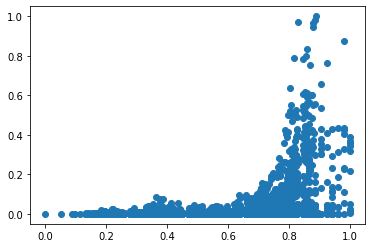

In [104]:
life = sk_norm['Life expectancy '].tolist()
exp = sk_norm['percentage expenditure'].tolist()

import matplotlib.pyplot as plt
plt.scatter(life, exp)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

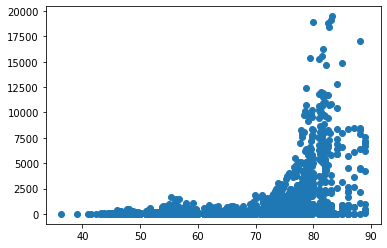

In [105]:
life = df['Life expectancy '].tolist()
exp = df['percentage expenditure'].tolist()

import matplotlib.pyplot as plt
plt.scatter(life, exp)
plt.show

We observe an interesting situation here! We see that if the average life of a country is less that 65, then the effect of increasing the expenditure on health shows no relation, however, if the average age is between 65 to 85, then the avergae spending plays a tremendous part here! <br>
Thus, countries with average life expectance above 65 should spend more in order to improve the average lifespan

C. The correlation between infant mortality rate and adult mortality rate and the average lifespan is as follows:<br>
IMR and Lifespan: -0.196557<br>
AMR and Lifespan: -0.696359<br>
We see that the correlation between these two and average lifespan is negative, which means that if the infant mortality rate or the adult mortality rate rises, then the average lifespan decrease, which is quite intuitive

D. Let's see the correlation between the life expectancy and various lifestyle habits like Alcohol.<br>
Alcohol and Lifespan: 0.404877	<br>
So, we can say that alcohol affects the life expectancy upto some extent as seen by the correlation coefficient!

E. Let's draw a scatter plot for Schooling vs Lifespan and the analyse it using the correlation coefficient

<function matplotlib.pyplot.show(*args, **kw)>

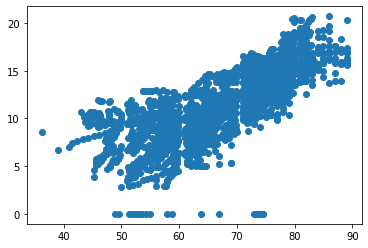

In [106]:
sch = df['Schooling'].tolist()

import matplotlib.pyplot as plt
plt.scatter(life, sch)
plt.show

We can see that schooling has a very strong direct correlation with the average lifespan, with a Pearson's correlation coefficient of 0.75. This may be due to the fact that schooling teaches many things about a healthy lifestyle and even first aids, which can be life saving in critical conditions

F. Life expectancy has a direct positive correlation with drinking alcohol with a correlation coefficient of 0.404877

G. The correlation coefficient of the population of a country and the life expectancy is -0.021538, which basically means that if the population rises, then the life expectancy decrease. This may be due to the fact the more population have severe effect on the capacity of the health system and it may crash because of this